# Reference:
Code: https://github.com/jessgess/Time_Series_Analysis_ARIMA/blob/master/time_series.ipynb

In [330]:
import pandas as pd
# from pandas import datetime as dt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import tsa

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# import datetime
# import tzlocal

In [331]:
# time_zone_name = tzlocal.get_localzone().zone
# time_zone_name

In [336]:
url_binance_bnbusdt_5m = "https://api.binance.com/api/v3/klines?symbol=BNBUSDT&limit=1000&interval=5m"
data = pd.read_json(url_binance_bnbusdt_5m)

data.columns = [
    'time', 
    'open', 
    'high', 
    'low', 
    'close', 
    'volume', 
    'close_time', 
    'quote_asset_volume', 
    'number_of_trades', 
    'taker_buy_base_asset_volume', 
    'taker_buy_quote_asset_volume', 
    'unused'
]

data['date'] = pd.to_datetime(df['time'], unit='ms')
# data['date'] = data['date'].dt.tz_convert(time_zone_name)
data.tail(5)

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,unused,date
995,1667284500000,328.0,328.1,327.7,327.9,1029.949,1667284799999,337729.8755,653,401.724,131750.8363,0,2022-10-30 14:00:00
996,1667284800000,327.9,328.1,327.6,327.8,1228.245,1667285099999,402650.0829,815,388.921,127535.7412,0,2022-10-30 14:05:00
997,1667285100000,327.7,328.3,327.5,328.3,879.111,1667285399999,288251.9534,725,684.915,224590.9782,0,2022-10-30 14:10:00
998,1667285400000,328.2,328.9,328.2,328.6,1888.314,1667285699999,620421.9285,1078,1240.506,407557.7005,0,2022-10-30 14:15:00
999,1667285700000,328.7,328.9,328.5,328.8,551.535,1667285999999,181308.6857,442,332.228,109214.7602,0,2022-10-30 14:20:00


Text(0, 0.5, 'Close Price')

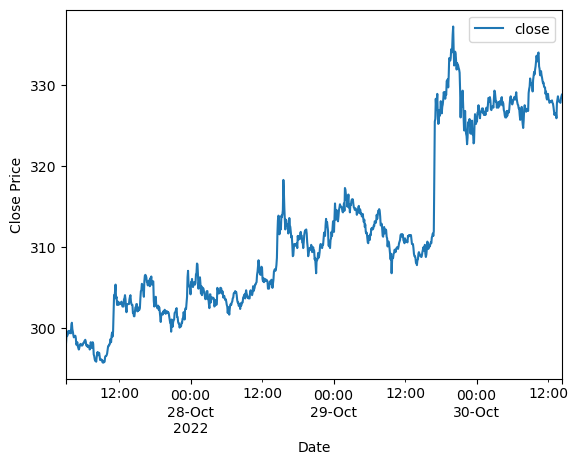

In [337]:
ax = data.plot(x='date', y='close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

In [338]:
# We can format the Date column and use its unique values as index.
data_study = data.copy()
data_study['date'] = data_study['date']
data_study.set_index(pd.to_datetime(data_study['date']), inplace=True)
data_study.drop('date', axis=1, inplace=True)
data_study

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,unused
date,,,,,,,,,,,,
2022-10-27 03:05:00,1666986000000,297.6,298.2,297.6,298.0,713.009,1666986299999,212484.0776,652,446.319,133000.6063,0
2022-10-27 03:10:00,1666986300000,297.9,298.9,297.9,298.9,2179.723,1666986599999,650492.4538,734,1891.729,564547.7233,0
2022-10-27 03:15:00,1666986600000,298.9,299.4,298.8,299.1,1470.825,1666986899999,440011.0704,824,944.343,282533.0644,0
2022-10-27 03:20:00,1666986900000,299.1,299.2,298.7,299.1,491.009,1666987199999,146815.9777,498,301.476,90151.6950,0
2022-10-27 03:25:00,1666987200000,299.1,299.5,299.0,299.4,1428.377,1666987499999,427445.3957,804,973.727,291397.7358,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30 14:00:00,1667284500000,328.0,328.1,327.7,327.9,1029.949,1667284799999,337729.8755,653,401.724,131750.8363,0
2022-10-30 14:05:00,1667284800000,327.9,328.1,327.6,327.8,1228.245,1667285099999,402650.0829,815,388.921,127535.7412,0
2022-10-30 14:10:00,1667285100000,327.7,328.3,327.5,328.3,879.111,1667285399999,288251.9534,725,684.915,224590.9782,0


In [339]:
close_price = data_study['close']

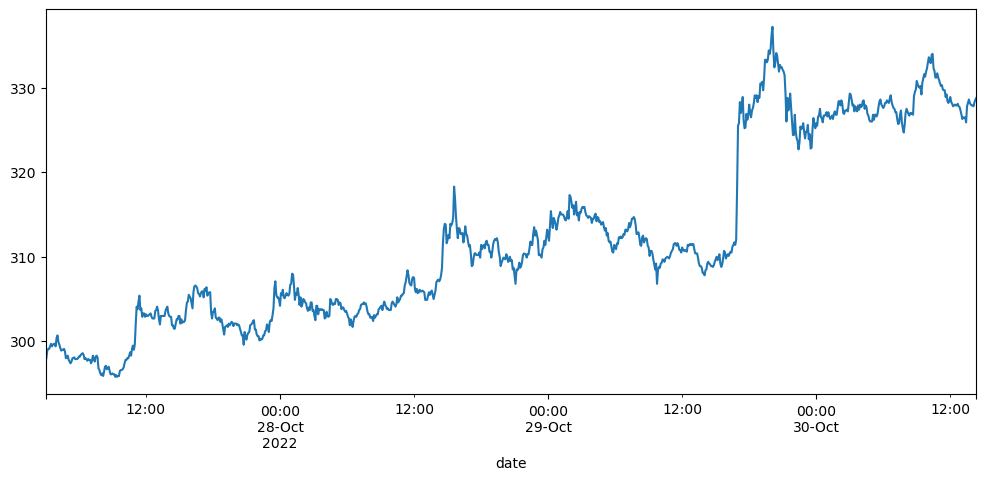

In [340]:
close_price.plot(figsize=(12, 5))
plt.show()

## Moving Average

In [341]:
rroll_p50 = close_price.rolling(window=50).mean()
rroll_p100 = close_price.rolling(window=100).mean()
rroll_p200 = close_price.rolling(window=200).mean()

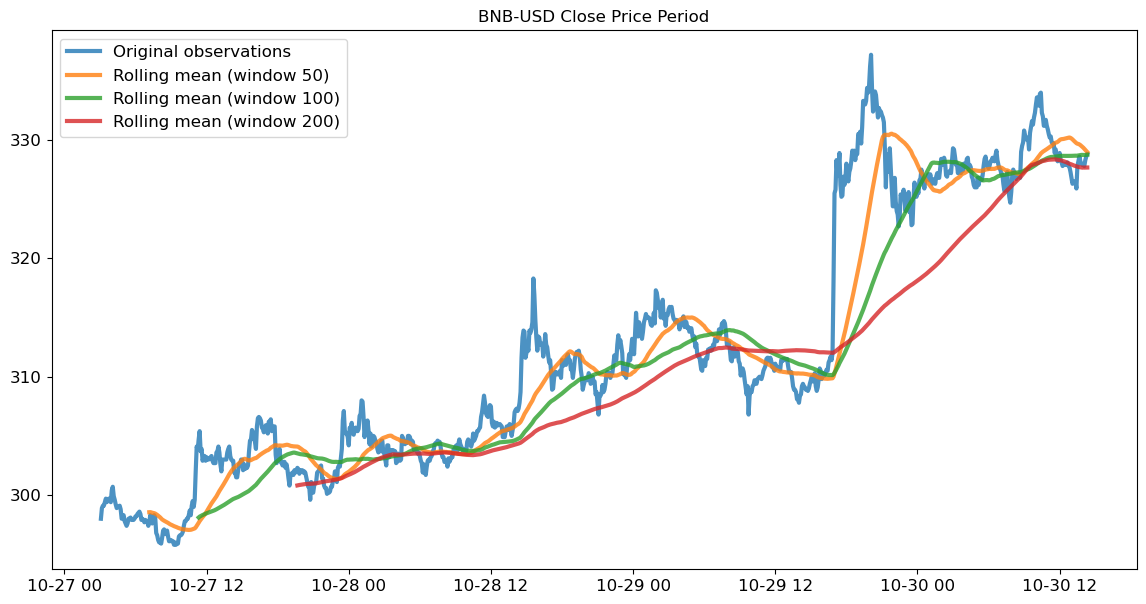

In [342]:
plt.figure(figsize=(14, 7))
plt.plot(close_price.index, close_price, lw=3, alpha=0.8,label='Original observations')
plt.plot(close_price.index, rroll_p50, lw=3, alpha=0.8,label='Rolling mean (window 50)')
plt.plot(close_price.index, rroll_p100, lw=3, alpha=0.8,label='Rolling mean (window 100)')
plt.plot(close_price.index, rroll_p200, lw=3, alpha=0.8,label='Rolling mean (window 200)')
plt.title('BNB-USD Close Price Period')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

## Dual Moving Average Crossover

In [343]:
short_window = 30
mid_window = 50

signals = pd.DataFrame(index=close_price.index)
signals['signal'] = 0.0

roll_pshort = close_price.rolling(window=short_window).mean()
roll_pmid = close_price.rolling(window=mid_window).mean()

signals['short_mavg'] = roll_pshort
signals['mid_mavg'] = roll_pmid
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

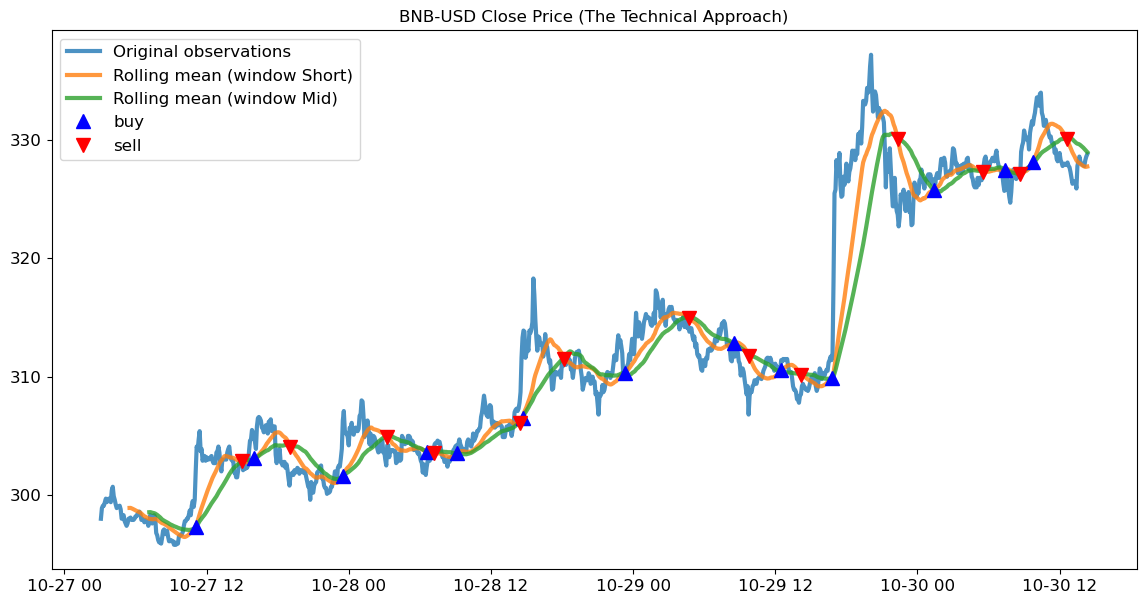

In [344]:
plt.figure(figsize=(14, 7))
plt.plot(close_price.index, close_price, lw=3, alpha=0.8,label='Original observations')
plt.plot(close_price.index, roll_pshort, lw=3, alpha=0.8,label='Rolling mean (window Short)')
plt.plot(close_price.index, roll_pmid, lw=3, alpha=0.8,label='Rolling mean (window Mid)')

plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='b', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r', label='sell')

plt.title('BNB-USD Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [345]:
signals.loc[signals['positions'] == -1.0], signals.loc[signals['positions'] == 1.0]

(                     signal  short_mavg  mid_mavg  positions
 date                                                        
 2022-10-27 15:00:00     0.0  302.883333   302.936       -1.0
 2022-10-27 19:05:00     0.0  304.070000   304.162       -1.0
 2022-10-28 03:15:00     0.0  304.930000   304.956       -1.0
 2022-10-28 07:10:00     0.0  303.553333   303.566       -1.0
 2022-10-28 14:25:00     0.0  306.053333   306.090       -1.0
 2022-10-28 18:10:00     0.0  311.533333   311.676       -1.0
 2022-10-29 04:45:00     0.0  314.926667   314.986       -1.0
 2022-10-29 09:45:00     0.0  311.770000   311.908       -1.0
 2022-10-29 14:10:00     0.0  310.180000   310.262       -1.0
 2022-10-29 22:20:00     0.0  330.110000   330.264       -1.0
 2022-10-30 05:30:00     0.0  327.336667   327.406       -1.0
 2022-10-30 08:40:00     0.0  327.093333   327.100       -1.0
 2022-10-30 12:35:00     0.0  330.086667   330.154       -1.0,
                      signal  short_mavg  mid_mavg  positions
 date  

In [346]:
signals.tail(5)

,signal,short_mavg,mid_mavg,positions
date,,,,
2022-10-30 14:00:00,0.0,327.796667,329.348,0.0
2022-10-30 14:05:00,0.0,327.760000,329.258,0.0
2022-10-30 14:10:00,0.0,327.730000,329.164,0.0
2022-10-30 14:15:00,0.0,327.736667,329.064,0.0
2022-10-30 14:20:00,0.0,327.756667,328.978,0.0


In [347]:
# Last Buy Position Change
last_buy_position = signals.loc[signals['positions'] == 1.0].tail(1)
last_buy_position['time_delta'] = (pd.Timestamp.now() - last_buy_position.index.values[0])
last_buy_position['hours_ago'] = last_buy_position['time_delta'] / pd.Timedelta(hours=1)
last_buy_position['mins_ago'] = last_buy_position['time_delta'] / pd.Timedelta(minutes=1)
last_buy_position

,signal,short_mavg,mid_mavg,positions,time_delta,hours_ago,mins_ago
date,,,,,,,
2022-10-30 09:45:00,1.0,328.12,328.056,1.0,1 days 18:13:44.327422,42.22898,2533.73879


In [348]:
# Last Sell Position Change
last_sell_position = signals.loc[signals['positions'] == -1.0].tail(1)
last_sell_position['time_delta'] = (pd.Timestamp.now() - last_sell_position.index.values[0])
last_sell_position['hours_ago'] = last_sell_position['time_delta'] / pd.Timedelta(hours=1)
last_sell_position['mins_ago'] = last_sell_position['time_delta'] / pd.Timedelta(minutes=1)
last_sell_position

,signal,short_mavg,mid_mavg,positions,time_delta,hours_ago,mins_ago
date,,,,,,,
2022-10-30 12:35:00,0.0,330.086667,330.154,-1.0,1 days 15:23:48.491008,39.396803,2363.808183


In [349]:
signals.iloc[-1]

signal          0.000000
short_mavg    327.756667
mid_mavg      328.978000
positions       0.000000
Name: 2022-10-30 14:20:00, dtype: float64

In [350]:
if signals.iloc[-1].signal == 0:
    print("Last is under Sell")
else:
    print("Last is under Buy")

Last is under Sell


In [351]:
initial_investment = close_price.loc[list(signals[signals.positions == 1.0].index)][0]
bought = np.sum(close_price.loc[list(signals[signals.positions == 1.0].index)]*-1.0)
sold = np.sum(close_price.loc[list(signals[signals.positions == -1.0].index)])
current_value = close_price[-1]

balance = pd.DataFrame([close_price.loc[list(signals[signals.positions == 1.0].index)]*-1.0,
              close_price.loc[list(signals[signals.positions == -1.0].index)]]).transpose()
balance = balance.fillna(0)
balance['balance'] = balance.sum(axis=1)

print("Initial investment amount: {0:.2f} USD".format(initial_investment))
print("Maximum invested amount: {0:.2f} USD".format(abs(min(balance.cumsum().balance))))
print("Current asset value: {0:.2f} USD".format(bought+sold+current_value))

Initial investment amount: 302.00 USD
Maximum invested amount: 323.60 USD
Current asset value: 333.10 USD


## Exponential Moving Average

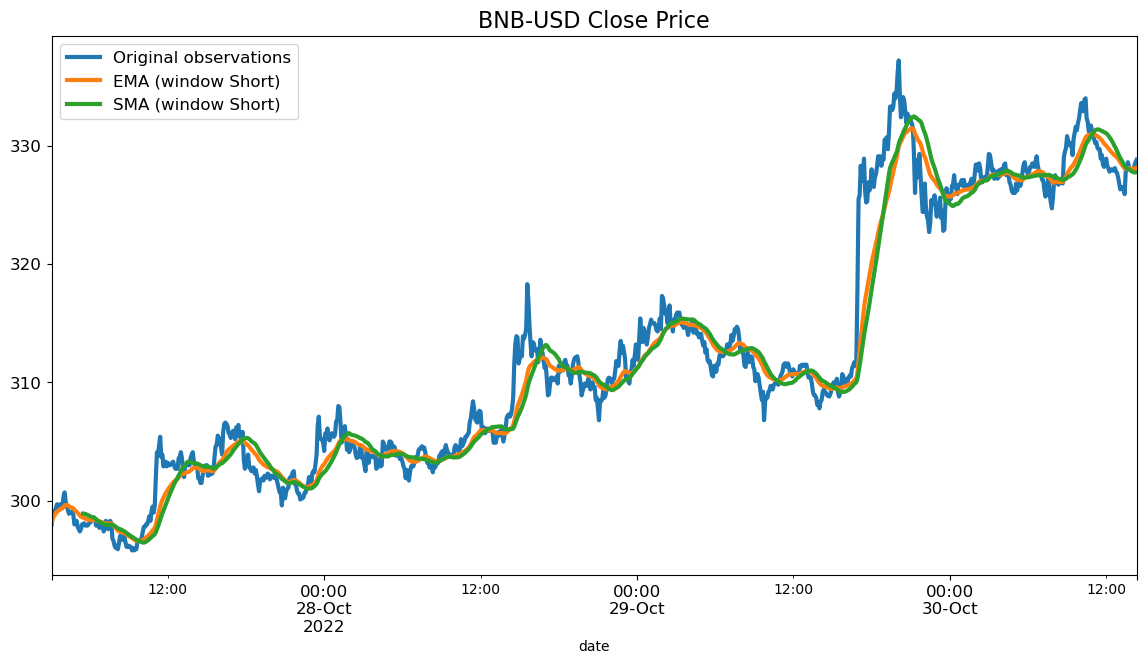

In [352]:
exp_weighted_mean = close_price.ewm(span=30).mean()
sma_pshort = close_price.rolling(window=30).mean()
ax = close_price.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='EMA (window Short)')
sma_pshort.plot(ax=ax, lw=3, label='SMA (window Short)')
plt.title('BNB-USD Close Price', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [353]:
exp_weighted_mean = close_price.ewm(span=30).mean()
signals_ema = pd.DataFrame(index=close_price.index)
signals_ema['signal'] = 0.0

signals_ema['original'] = close_price
signals_ema['EMA'] = exp_weighted_mean

signals_ema['signal'] = np.where(signals_ema['original'] 
                                            > signals_ema['EMA'], 1.0, 0.0)
signals_ema['positions'] = signals_ema['signal'].diff()

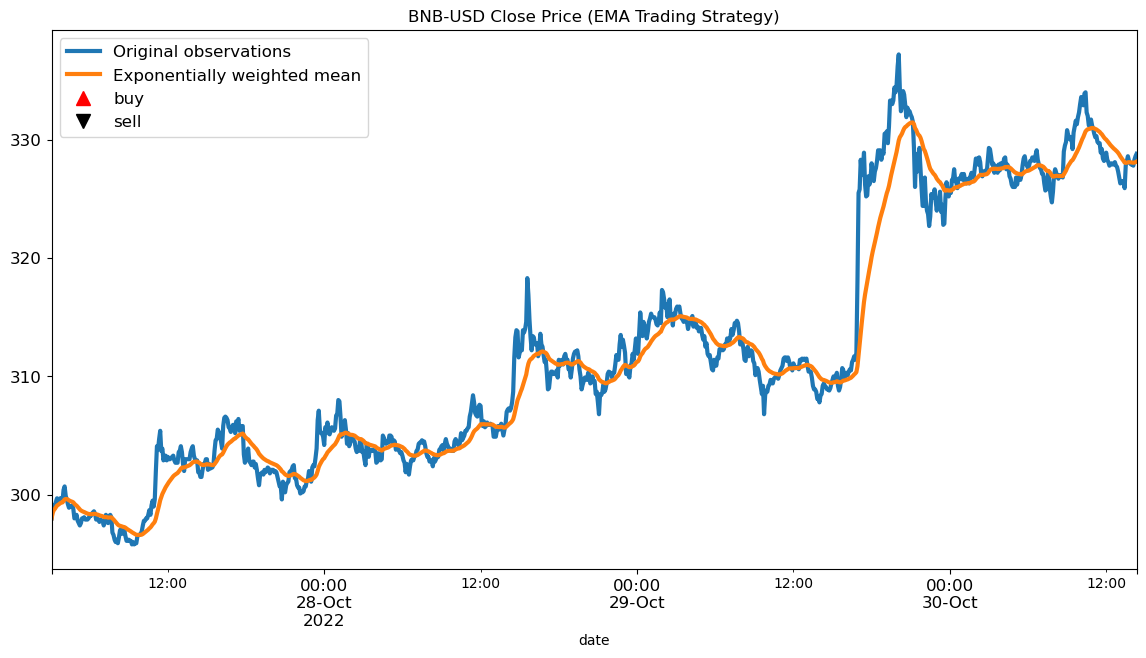

In [354]:
plt.figure(figsize=(14, 7))

ax = close_price.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='Exponentially weighted mean')

plt.plot(signals_ema.loc[signals_ema.positions == 1.0].index, 
         signals_ema.EMA[signals_ema.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals_ema.loc[signals_ema.positions == -1.0].index, 
         signals_ema.EMA[signals_ema.positions == -1.0],
         'v', markersize=10, color='k', label='sell')

plt.title('BNB-USD Close Price (EMA Trading Strategy)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [355]:
initial_investment = close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)][0]
bought = np.sum(close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)]*-1.0)
sold = np.sum(close_price.loc[list(signals_ema[signals_ema.positions == -1.0].index)])
current_value = close_price[-1]

balance_ema = pd.DataFrame([close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)]*-1.0,
              close_price.loc[list(signals_ema[signals_ema.positions == -1.0].index)]]).transpose()
balance_ema = balance_ema.fillna(0)
balance_ema['balance'] = balance_ema.sum(axis=1)

print("Initial investment amount: {0:.2f} USD".format(initial_investment))
print("Maximum invested amount: {0:.2f} USD".format(abs(min(balance_ema.cumsum().balance))))
print("Current asset value: {0:.2f} USD".format(bought+sold+current_value))

Initial investment amount: 298.90 USD
Maximum invested amount: 311.80 USD
Current asset value: 19.40 USD


In [356]:
signals

,signal,short_mavg,mid_mavg,positions
date,,,,
2022-10-27 03:05:00,0.0,NaN,NaN,NaN
2022-10-27 03:10:00,0.0,NaN,NaN,0.0
2022-10-27 03:15:00,0.0,NaN,NaN,0.0
2022-10-27 03:20:00,0.0,NaN,NaN,0.0
2022-10-27 03:25:00,0.0,NaN,NaN,0.0
...,...,...,...,...
2022-10-30 14:00:00,0.0,327.796667,329.348,0.0
2022-10-30 14:05:00,0.0,327.760000,329.258,0.0
2022-10-30 14:10:00,0.0,327.730000,329.164,0.0


In [357]:
signals_ema

,signal,original,EMA,positions
date,,,,
2022-10-27 03:05:00,0.0,298.0,298.000000,NaN
2022-10-27 03:10:00,1.0,298.9,298.465000,1.0
2022-10-27 03:15:00,1.0,299.1,298.690929,0.0
2022-10-27 03:20:00,1.0,299.1,298.803643,0.0
2022-10-27 03:25:00,1.0,299.4,298.939329,0.0
...,...,...,...,...
2022-10-30 14:00:00,0.0,327.9,328.064329,0.0
2022-10-30 14:05:00,0.0,327.8,328.047276,0.0
2022-10-30 14:10:00,1.0,328.3,328.063580,1.0


In [358]:
pd.Timestamp.utcnow()

Timestamp('2022-11-01 06:59:01.066808+0000', tz='UTC')

In [359]:
pd.Timestamp.now()

Timestamp('2022-11-01 03:59:01.508059')